In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np



In [73]:
pf=pd.read_csv("heart.csv")
pf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [119]:
pf.isnull().sum()

Yaş                 0
Cinsiyet            0
göğüs AgrısıTipi    0
Tansiyon            0
Kolestrol           0
AçlıkŞekeri         0
EKG                 0
MaxNabız            0
EgzersizAgrısı      0
ST_degeri           0
ST_Eğimi            0
KalpHastalığı       0
dtype: int64

In [110]:
# LabelEncoder oluştur
encoder = LabelEncoder()

# Çevrilecek kolonlar
object_kolonlar = ['Cinsiyet', 'göğüs AgrısıTipi', 'EKG', 'EgzersizAgrısı', 'ST_Eğimi']

# Her bir object kolonu dön ve LabelEncode yap
for kolon in object_kolonlar:
    pf[kolon] = encoder.fit_transform(pf[kolon])

In [111]:
pf.dtypes

Yaş                   int64
Cinsiyet              int64
göğüs AgrısıTipi      int64
Tansiyon              int64
Kolestrol             int64
AçlıkŞekeri           int64
EKG                   int64
MaxNabız              int64
EgzersizAgrısı        int64
ST_degeri           float64
ST_Eğimi              int64
KalpHastalığı         int64
dtype: object

In [100]:
pf.describe() # genel özet çıkartımı

,Yaş,Cinsiyet,göğüs AgrısıTipi,Tansiyon,Kolestrol,AçlıkŞekeri,EKG,MaxNabız,EgzersizAgrısı,ST_degeri,ST_Eğimi,KalpHastalığı
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [101]:
pf.columns=["Yaş","Cinsiyet","göğüs AgrısıTipi","Tansiyon","Kolestrol","AçlıkŞekeri","EKG","MaxNabız",
            "EgzersizAgrısı","ST_degeri","ST_Eğimi",
            "KalpHastalığı"]
pf.head()

,Yaş,Cinsiyet,göğüs AgrısıTipi,Tansiyon,Kolestrol,AçlıkŞekeri,EKG,MaxNabız,EgzersizAgrısı,ST_degeri,ST_Eğimi,KalpHastalığı
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [78]:
pf.isnull().sum()

Yaş                 0
Cinsiyet            0
göğüs AgrısıTipi    0
Tansiyon            0
Kolestrol           0
AçlıkŞekeri         0
EKG                 0
MaxNabız            0
EgzersizAgrısı      0
ST_degeri           0
ST_Eğimi            0
KalpHastalığı       0
dtype: int64

In [102]:
pf.describe() # genel özet çıkartımı

,Yaş,Cinsiyet,göğüs AgrısıTipi,Tansiyon,Kolestrol,AçlıkŞekeri,EKG,MaxNabız,EgzersizAgrısı,ST_degeri,ST_Eğimi,KalpHastalığı
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


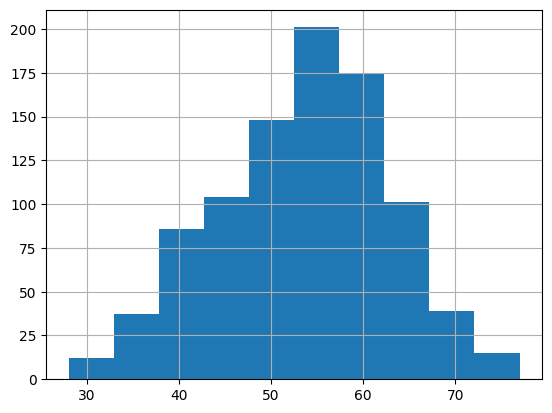

In [79]:
pf['Yaş'].hist()
plt.show()


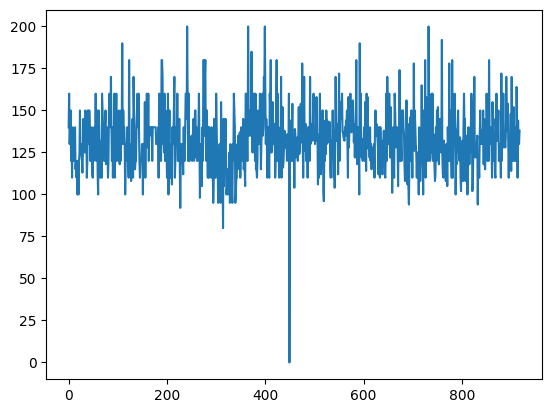

In [103]:
pf['Tansiyon'].plot()
plt.show()

In [104]:
pf.groupby("KalpHastalığı")["Tansiyon"].mean()

KalpHastalığı
0    130.180488
1    134.185039
Name: Tansiyon, dtype: float64

In [105]:
import  seaborn as sns

In [106]:
X=pf.drop(columns=['KalpHastalığı'])
y=pf['KalpHastalığı']
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

In [107]:
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [112]:
y_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [114]:
mae = mean_absolute_error(y_pred,y_test)
mae

0.18615385428335904

In [115]:
mse = mean_squared_error(y_pred,y_test)
mse

0.10142869709162515

In [116]:
r2 = r2_score(y_pred,y_test)
r2

0.3835776337853203

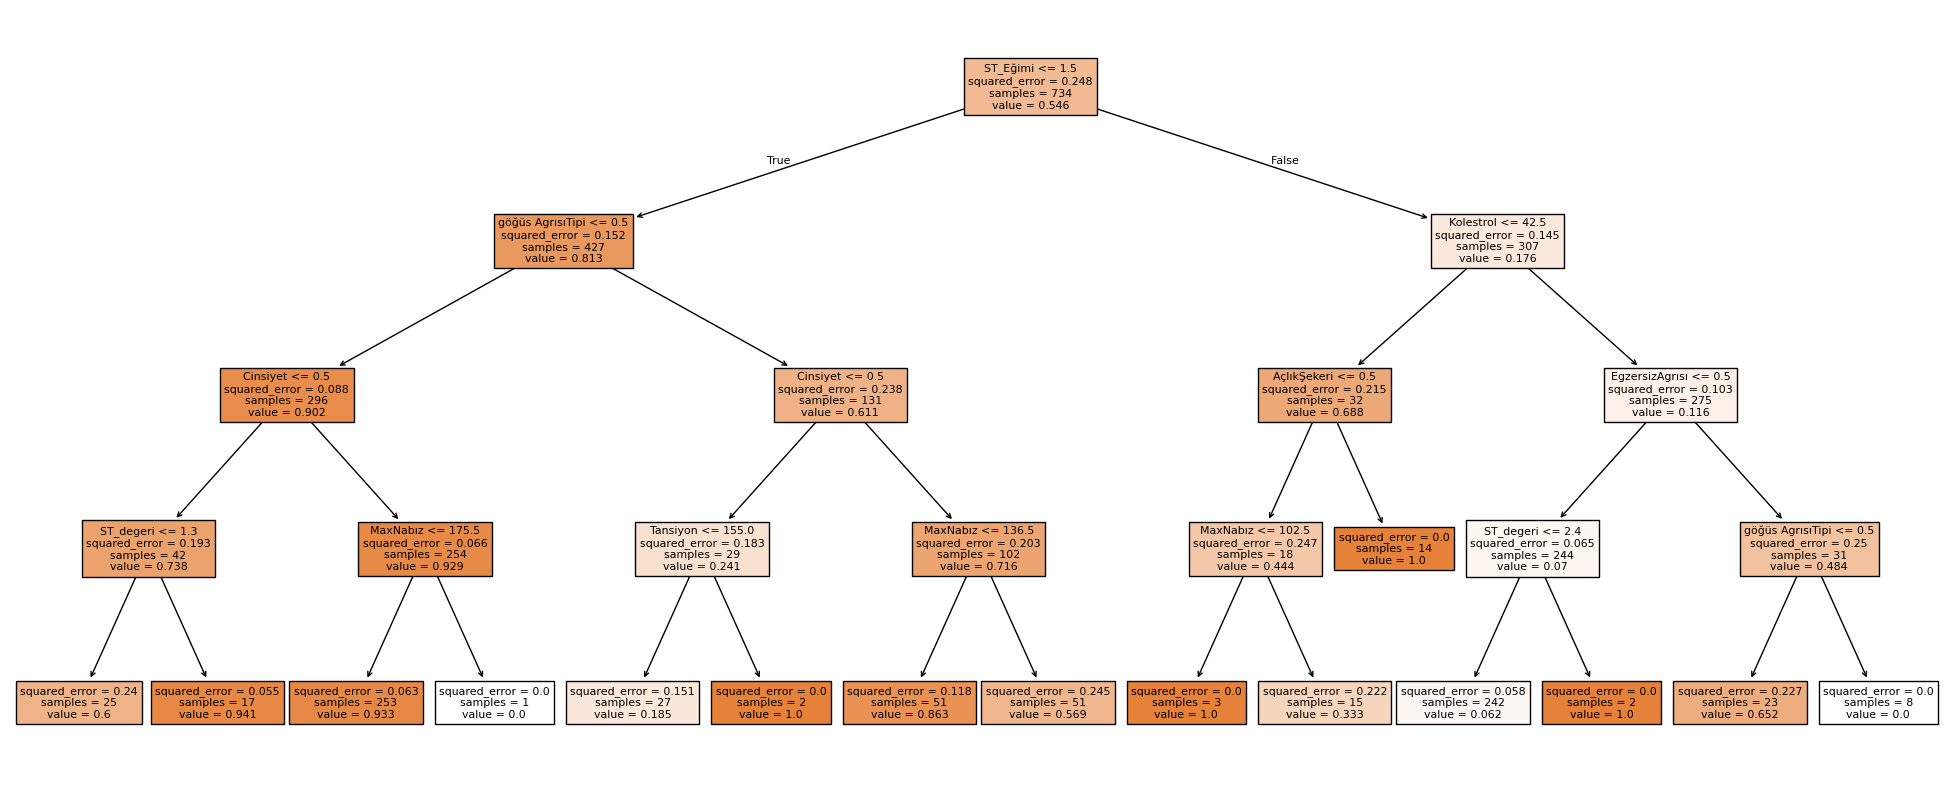

In [118]:
# OverFitting => Ezberlemek.
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()